# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

MEDV is the dependent variable.

## Using this dataset, explain your understanding of linear regression. You should do some checks on the features and the dependent variable, get some plots and distributions for the given variables. Please make this assignment as elaborate as you can.</b>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [ ]:
file_path = '/content/drive/MyDrive/housing.csv'
boston_house=pd.read_csv(file_path, encoding='iso-8859-1',header=None, delimiter=r"\s+", names=column_names)

Performing basic operation

In [ ]:
boston_house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston_house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [ ]:
boston_house.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

##  Dimension of data

In [ ]:
boston_house.shape

(506, 14)

## Let's have look to the summary of data

In [ ]:
boston_house.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Let's find correlation of the dataset.

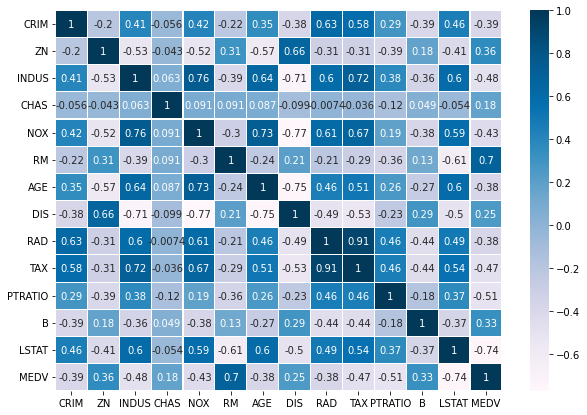

In [ ]:
plt.figure(figsize = (10,7))
tc = boston_house.corr()
sns.heatmap(tc, annot = True, cmap = 'PuBu', linecolor = 'white', linewidths=0.1)

## OBSERVATION:

### The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV which is a good indication of using as predictors. 

### From correlation matrix, we see TAX and RAD are highly correlated features.

### Let's plot the dataset and see interesting trends.

### we are going to use boxplot for identifyimg various trends

<Figure size 576x432 with 0 Axes>

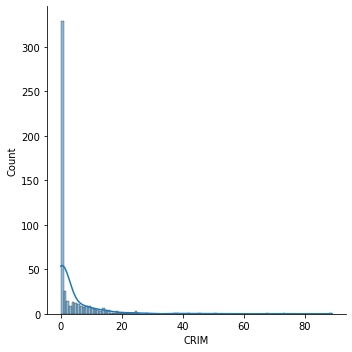

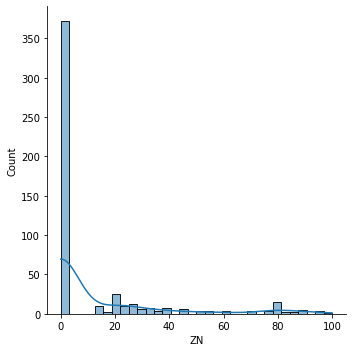

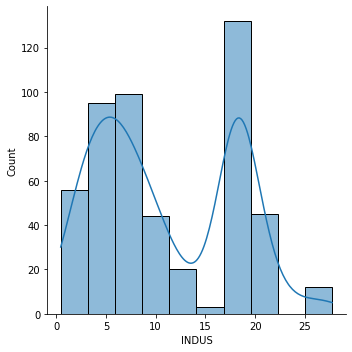

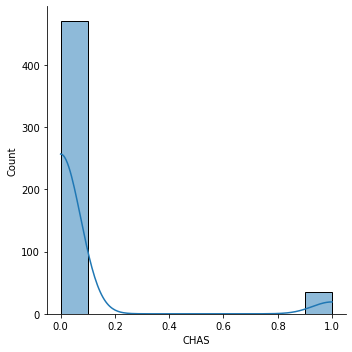

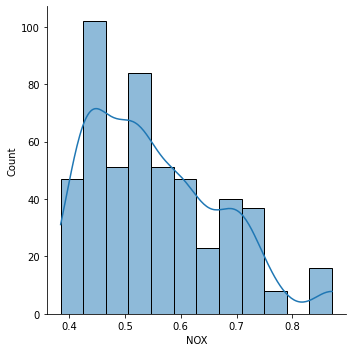

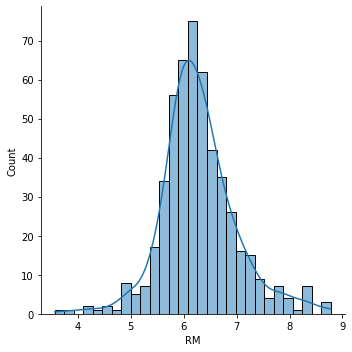

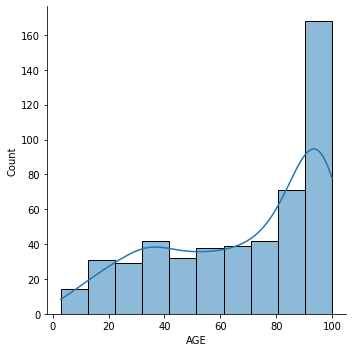

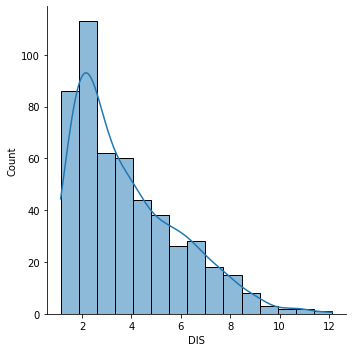

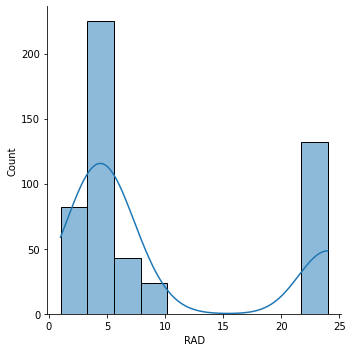

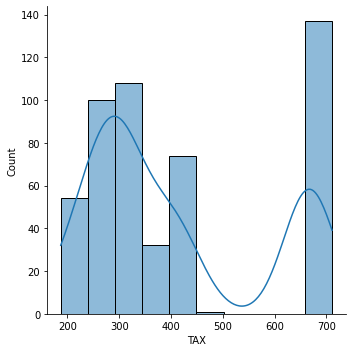

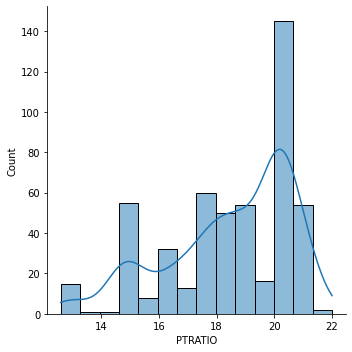

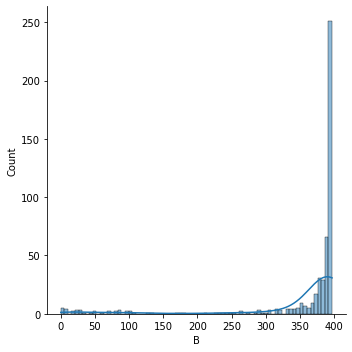

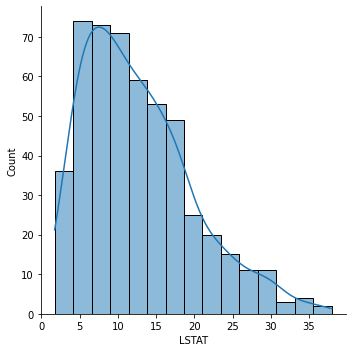

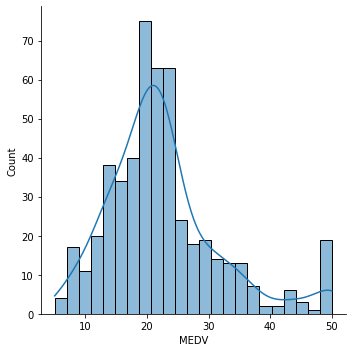

In [ ]:
plt.figure(figsize=(8,6))
for i in column_names:
  sns.displot(boston_house[i],kde=True)

## Observation:

### The histogram also shows that columns CRIM, ZN, B has highly skewed distributions.

### Also MEDV looks to have a normal distribution.



## Let's plot the columns against MEDV.

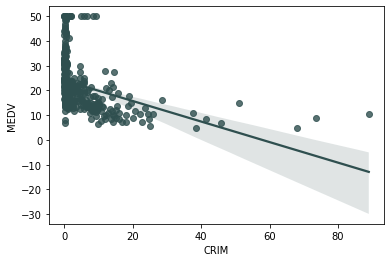

In [ ]:
sns.regplot(y = 'MEDV' , x = 'CRIM' , data = boston_house , color = 'darkslategrey')

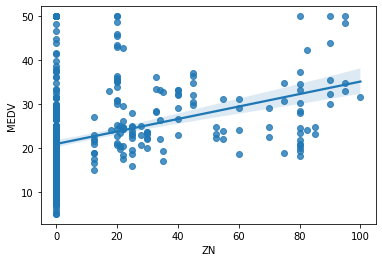

In [ ]:
sns.regplot(y = 'MEDV' , x = 'ZN' , data = boston_house)

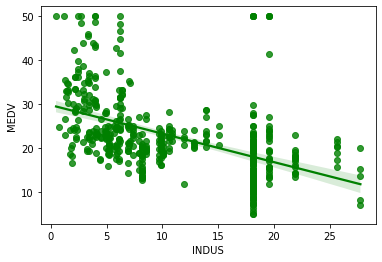

In [ ]:
sns.regplot(y = 'MEDV' , x = 'INDUS' , data = boston_house, color="g")

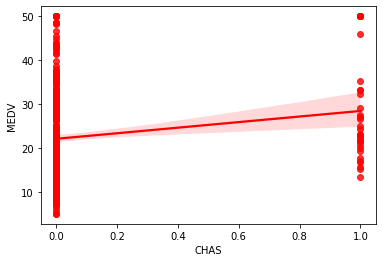

In [ ]:
sns.regplot(y = 'MEDV' , x = 'CHAS' , data = boston_house , color = 'red')

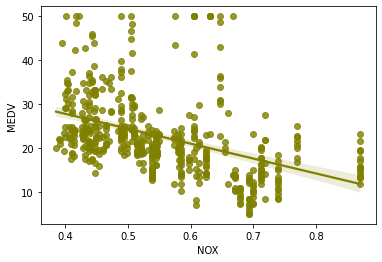

In [ ]:
sns.regplot(y = 'MEDV' , x = 'NOX' , data = boston_house , color = 'olive')

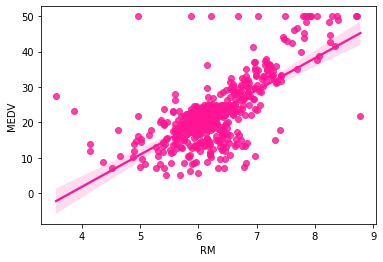

In [ ]:
sns.regplot(y = 'MEDV' , x = 'RM' , data = boston_house , color = 'deeppink')

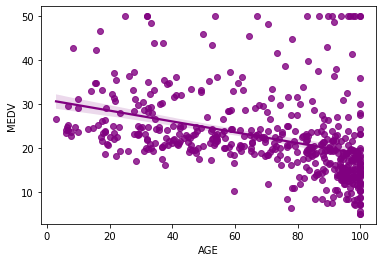

In [ ]:
sns.regplot(y = 'MEDV' , x = 'AGE' , data = boston_house , color = 'purple')

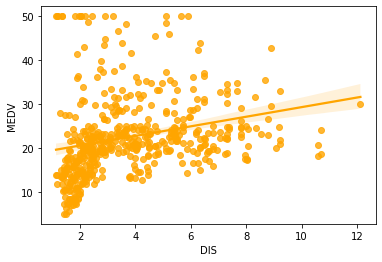

In [ ]:
sns.regplot(y = 'MEDV' , x = 'DIS' , data = boston_house , color = 'orange')

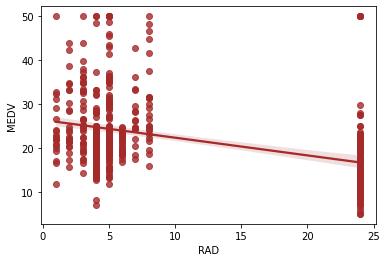

In [ ]:
sns.regplot(y = 'MEDV' , x = 'RAD' , data = boston_house , color = 'brown')

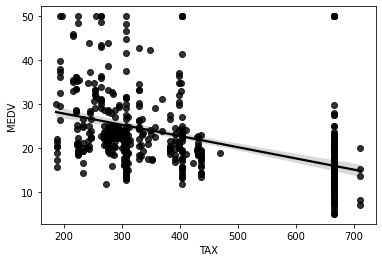

In [ ]:
sns.regplot(y = 'MEDV' , x = 'TAX' , data = boston_house ,color= 'black')

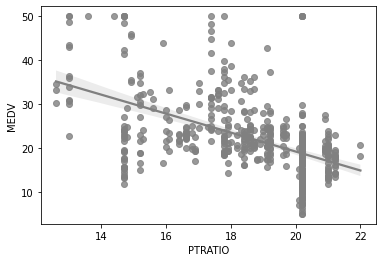

In [ ]:
sns.regplot(y = 'MEDV' , x = 'PTRATIO' , data = boston_house , color = 'grey')

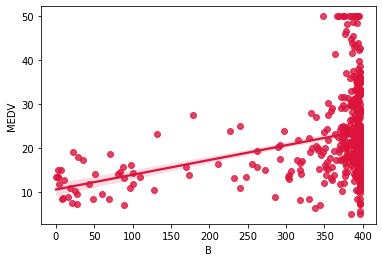

In [ ]:
sns.regplot(y = 'MEDV' , x = 'B' , data = boston_house , color = 'crimson')

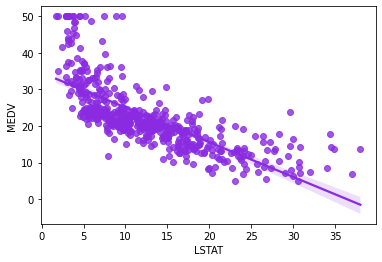

In [ ]:
sns.regplot(y = 'MEDV' , x = 'LSTAT' , data = boston_house , color = 'blueviolet')

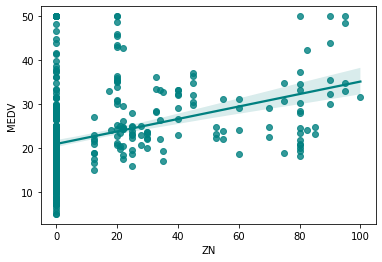

In [ ]:
sns.regplot(y = 'MEDV' , x = 'ZN' , data = boston_house , color = 'teal')

## Observation:

### So with these analsis, we may try predict MEDV with 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE' features. 

## Let's try Linear Regression on dataset first.

In [ ]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
reg = linear_model.LinearRegression()

In [ ]:
X = boston_house.drop('MEDV', axis=1).values
y = boston_house['MEDV'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn import metrics
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score: {}'.format(model.score(X_train , y_train)))

    predictions = model.predict(X_test)
    print('Predictions are:{}'.format(predictions))

    print('\n')

    r2_score = metrics.r2_score(y_test,predictions)
    print('r2 score is:{}'.format(r2_score))

    print('MAE',metrics.mean_absolute_error(y_test,predictions))
    print('MSE',metrics.mean_squared_error(y_test,predictions))
    print('RMSE',np.sqrt(metrics.mean_absolute_error(y_test,predictions)))
    sns.distplot(y_test-predictions)

Training score: 0.7730135569264234
Predictions are:[24.88963777 23.72141085 29.36499868 12.12238621 21.44382254 19.2834443
 20.49647539 21.36099298 18.8967118  19.9280658   5.12703513 16.3867396
 17.07776485  5.59375659 39.99636726 32.49654668 22.45798809 36.85192327
 30.86401089 23.15140009 24.77495789 24.67187756 20.59543752 30.35369168
 22.41940736 10.23266565 17.64816865 18.27419652 35.53362541 20.96084724
 18.30413012 17.79262072 19.96561663 24.06127231 29.10204874 19.27774123
 11.15536648 24.57560579 17.5862644  15.49454112 26.20577527 20.86304693
 22.31460516 15.60710156 23.00363104 25.17247952 20.11459464 22.90256276
 10.0380507  24.28515123 20.94127711 17.35258791 24.52235405 29.95143046
 13.42695877 21.72673066 20.7897053  15.49668805 13.98982601 22.18377874
 17.73047814 21.58869165 32.90522136 31.11235671 17.73252635 32.76358681
 18.7124637  19.78693475 19.02958927 22.89825374 22.96041622 24.02555703
 30.72859326 28.83142691 25.89957059  5.23251817 36.72183202 23.77267249
 2

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


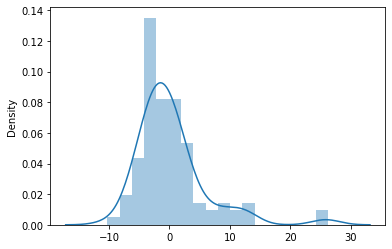

In [ ]:
predict(LinearRegression())

## Observation:

### features indexed LSTAT and RM are the most important features.